In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

OPCODE_DATA_PATH = '../data/final_gas_schedule_comparison.csv'

df = pd.read_csv(OPCODE_DATA_PATH)
df = df.rename(columns=lambda x: x.replace('gas', 'us'))

In [2]:
df['max_us'] = df[['besu_us', 'erigon_us', 'geth_us', 'nethermind_us', 'revm_us']].max(axis=1)
opcode_df = df[['opcode','max_us', 'besu_us', 'erigon_us', 'geth_us', 'nethermind_us', 'revm_us']]

In [3]:
ecrecover_us = opcode_df[opcode_df['opcode'] == 'ECRECOVER']['max_us'].values[0]
gas_per_us = 18000/ecrecover_us  # Assuming that  ECRECOVER accounts for ~18k/21k gas (imo roughly right)

In [4]:
opcode_df = opcode_df.assign(
    precise_gas=opcode_df['max_us'] * gas_per_us,
    gas_ceil=lambda df: np.ceil(df['precise_gas']),
    rounding_error=lambda df: ((np.ceil(df['precise_gas']) - df['precise_gas']) / df['precise_gas'])
)

opcode_df[['opcode', 'precise_gas', 'gas_ceil', 'rounding_error']]

,opcode,precise_gas,gas_ceil,rounding_error
0,ADD,7.508749,8.0,0.065424
1,MUL,8.526750,9.0,0.055502
2,SUB,7.126563,8.0,0.122561
3,DIV,6.100686,7.0,0.147412
4,SDIV,9.879860,10.0,0.012160
...,...,...,...,...
162,CREATE_ARG2,0.530775,1.0,0.884037
163,RETURN_ARG1,0.003240,1.0,307.651002
164,REVERT_ARG1,0.004499,1.0,221.275664
165,RIPEMD-160_ARG1,1.762846,2.0,0.134529


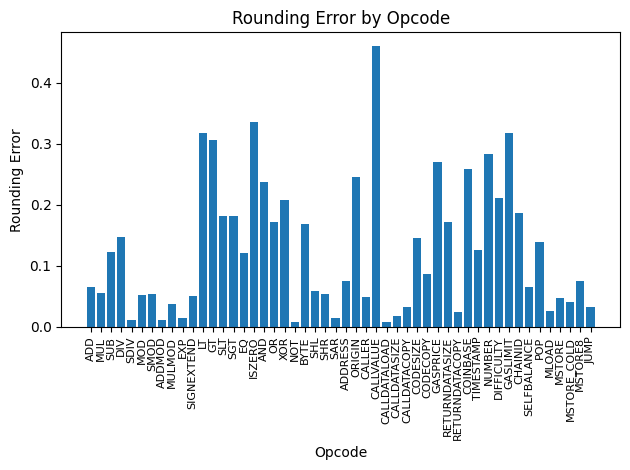

In [5]:
plt.bar(opcode_df['opcode'].head(50), opcode_df['rounding_error'].head(50))
plt.xlabel('Opcode')
plt.ylabel('Rounding Error')
plt.title('Rounding Error by Opcode')
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()